In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**PART 1**

In [2]:
# reading the csv files
users_df = pd.read_csv('users.txt', sep=':', names=['UserID', 'BeneficiaryIDs'])
areas_df = pd.read_csv('areas.csv')
visits_df = pd.read_csv('visits.csv')

In [3]:
users_df = users_df.assign(BeneficiaryIDs=users_df['BeneficiaryIDs'].str.split(','))

In [4]:
users_df.head()

,UserID,BeneficiaryIDs
0,CHW_27,"[ beneficiary_2253, beneficiary_11406, benefic..."
1,CHW_1,"[ beneficiary_19903, beneficiary_19276, benefi..."
2,CHW_62,"[ beneficiary_14370, beneficiary_6999, benefic..."
3,CHW_38,"[ beneficiary_1345, beneficiary_5596, benefici..."
4,CHW_24,"[ beneficiary_22846, beneficiary_3834, benefic..."


In [5]:
# splitting beneficiaries into seperate rows for each ID
users_df = users_df.explode('BeneficiaryIDs')

In [6]:
users_df.head()

,UserID,BeneficiaryIDs
0,CHW_27,beneficiary_2253
0,CHW_27,beneficiary_11406
0,CHW_27,beneficiary_3771
0,CHW_27,beneficiary_14319
0,CHW_27,beneficiary_14032


In [7]:
# experimenting
users_df.groupby('BeneficiaryIDs')['UserID'].value_counts()

BeneficiaryIDs      UserID
 beneficiary_10084  CHW_42    1
 beneficiary_10174  CHW_69    1
 beneficiary_11000  CHW_51    1
 beneficiary_11035  CHW_43    1
 beneficiary_11810  CHW_55    1
                             ..
beneficiary_9995    CHW_30    1
beneficiary_9996    CHW_64    1
beneficiary_9997    CHW_23    1
beneficiary_9998    CHW_53    1
beneficiary_9999    CHW_53    1
Name: UserID, Length: 23155, dtype: int64

In [8]:
areas_df.head()

,Beneficiary,Area
0,beneficiary_2253,District_1
1,beneficiary_11406,district_1
2,beneficiary_3771,DISTRICT_1
3,beneficiary_14319,DISTRICT_1
4,beneficiary_14032,district_1


In [9]:
# data preprocessing
areas_df['Area'] = areas_df['Area'].str.lower()
areas_df.head()

,Beneficiary,Area
0,beneficiary_2253,district_1
1,beneficiary_11406,district_1
2,beneficiary_3771,district_1
3,beneficiary_14319,district_1
4,beneficiary_14032,district_1


In [10]:
visits_df.head()

,Date,Type,Beneficiary
0,2020-01-02,Home,beneficiary_12746
1,2020-01-02,Home,beneficiary_21239
2,2020-01-02,Home,beneficiary_17874
3,2020-01-02,Home,beneficiary_20265
4,2020-01-02,Home,beneficiary_5908


In [11]:
# grouping by beneficiaries to calculate the no of visits
meetings_count  = visits_df.groupby('Beneficiary')['Beneficiary'].count()

In [12]:
meetings_count_df = meetings_count.reset_index(name='MeetingCount')

In [13]:
meetings_count_df.head()

,Beneficiary,MeetingCount
0,beneficiary_1,3
1,beneficiary_10,8
2,beneficiary_100,6
3,beneficiary_1000,6
4,beneficiary_10000,9


In [14]:
# merging the users_df and meetings_count_df to get information on no of meetings by USERID
merged_df = pd.merge(users_df, meetings_count_df, left_on='BeneficiaryIDs', right_on='Beneficiary', how='inner')

In [15]:
merged_df.drop('Beneficiary', axis=1, inplace=True)

In [16]:
merged_df.head()

,UserID,BeneficiaryIDs,MeetingCount
0,CHW_27,beneficiary_11406,2
1,CHW_27,beneficiary_3771,3
2,CHW_27,beneficiary_14319,5
3,CHW_27,beneficiary_14032,5
4,CHW_27,beneficiary_15025,1


In [17]:
# grouping by UserID to calculate the no of visits made by each unique UserID
user_meeting_count = merged_df.groupby('UserID')['MeetingCount'].count()

In [18]:
user_meeting_count = user_meeting_count.reset_index(name = 'MeetingCount')

In [19]:
user_meeting_count

,UserID,MeetingCount
0,CHW_1,277
1,CHW_10,291
2,CHW_11,288
3,CHW_12,313
4,CHW_13,322
...,...,...
67,CHW_70,302
68,CHW_71,293
69,CHW_72,290
70,CHW_8,294


In [20]:
# average no of meetings
round(user_meeting_count['MeetingCount'].mean())

313

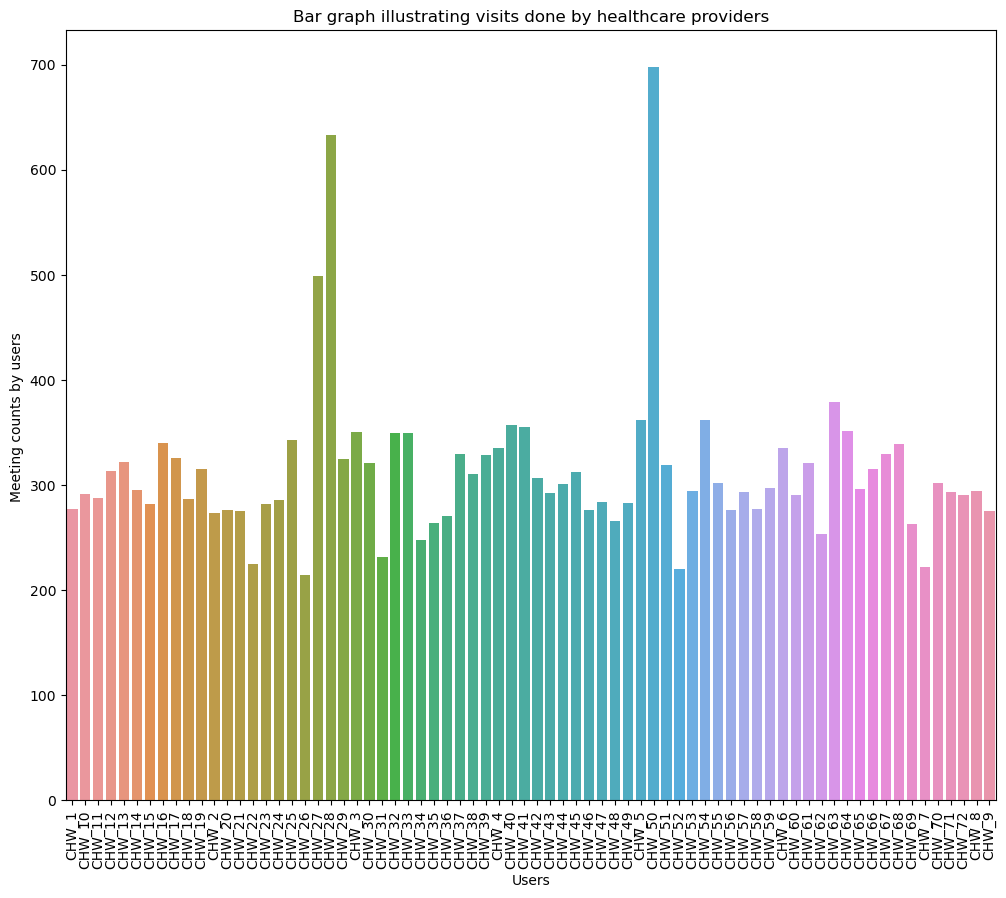

In [21]:
# plotting the chart
plt.figure(figsize=(12, 10))
sns.barplot(x = user_meeting_count['UserID'], y = user_meeting_count['MeetingCount'], width= 0.8)
plt.title("Bar graph illustrating visits done by healthcare providers")
plt.xlabel("Users")
plt.ylabel("Meeting counts by users ")
plt.xticks(rotation='vertical')
plt.show()

**Q1) Are all users doing the same amount of work? (and why)?**

**Answer:** From the graph it can be observed that work is not distributed equally among the users. For eg. User 27, 28 and 51 are doing considerally more work than average(313 meetings). Work can be distributed equally among users to maintain productivity and efficiency.

**PART 2**

In [22]:
# merging users_df and areas_df to get information on no of meetings based on area
merged_df1 = pd.merge(users_df, areas_df, left_on='BeneficiaryIDs', right_on='Beneficiary', how='inner')

In [23]:
merged_df1.head()

,UserID,BeneficiaryIDs,Beneficiary,Area
0,CHW_27,beneficiary_11406,beneficiary_11406,district_1
1,CHW_27,beneficiary_3771,beneficiary_3771,district_1
2,CHW_27,beneficiary_14319,beneficiary_14319,district_1
3,CHW_27,beneficiary_14032,beneficiary_14032,district_1
4,CHW_27,beneficiary_15025,beneficiary_15025,district_1


In [24]:
merged_df1.drop('Beneficiary', axis=1, inplace=True)

In [25]:
merged_df1

,UserID,BeneficiaryIDs,Area
0,CHW_27,beneficiary_11406,district_1
1,CHW_27,beneficiary_3771,district_1
2,CHW_27,beneficiary_14319,district_1
3,CHW_27,beneficiary_14032,district_1
4,CHW_27,beneficiary_15025,district_1
...,...,...,...
23078,CHW_39,beneficiary_10,district_50
23079,CHW_39,beneficiary_13535,district_50
23080,CHW_39,beneficiary_18743,district_50
23081,CHW_39,beneficiary_21146,district_50


In [26]:
merged_df1.shape

(23083, 3)

In [27]:
#merged_df1.groupby('Area')['BeneficiaryIDs'].count()

In [28]:
area_count = merged_df1.groupby('Area')['BeneficiaryIDs'].count()

In [29]:
area_count = area_count.reset_index(name = 'BeneficiaryIDs')

In [30]:
area_count.head()

,Area,BeneficiaryIDs
0,district_1,510
1,district_10,532
2,district_11,561
3,district_12,662
4,district_13,598


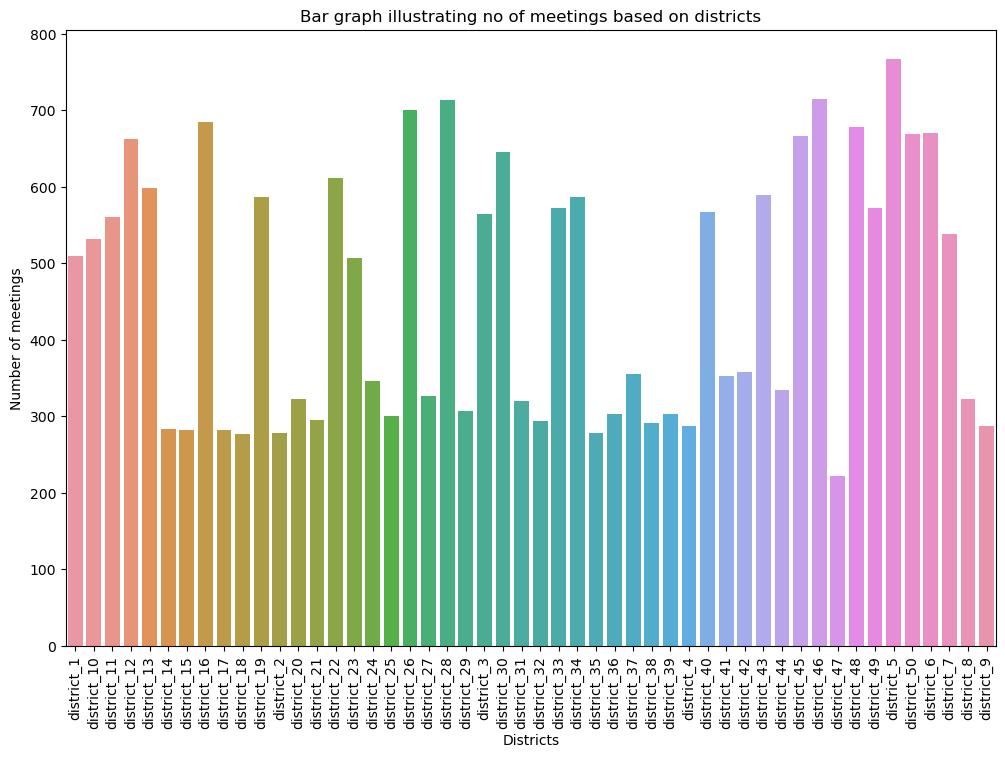

In [31]:
# plotting the chart
plt.figure(figsize=(12, 8))
sns.barplot(x = area_count['Area'], y = area_count['BeneficiaryIDs'], width= 0.8)
plt.title("Bar graph illustrating no of meetings based on districts")
plt.xlabel("Districts")
plt.ylabel("Number of meetings")
plt.xticks(rotation='vertical')
plt.show()

**Q2) Which districts have beneficiaries that are not receiving sufficient amounts of healthcare?**

**Assumptions:** Every district has equal number of beneficiaries and workers allocated to it.
For eg. 20k people, 50 districts = 400 people/ per district.
Workers around 72 -- 20k people/72 = 277 people/ per worker.

It can be observed that number of meetings are unequally distributed among districts. This is a contradiction to our assumptions. **Some districts have more than 700 number of meetings while some have less than 300.**

More workers can be allocated to districts which have more beneficiaries. Furthermore, data can be collected on new beneficiaries with 0 meetings. A mininum threshold can be set on the number of meetings to ensure that mininum requirements are satisfied and the services are provided equally. Different factors contributing to insufficient healthcare should be studied.

Time taken: approximately 1 hr 45mins